# Project Title: Laptop Price Prediction for SmartTech Co.
Project Overview:
SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

Client's Objectives:
Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

Key Challenges:
Diverse Specifications: The dataset encompasses laptops with diverse specifications. Our challenge is to build a model that generalizes well across a wide range of features.

Real-time Prediction: The model should have the capability to predict prices for newly released laptops, reflecting the fast-paced nature of the tech industry.

Interpretability: It is crucial to make the model interpretable, allowing SmartTech Co. to understand the rationale behind pricing predictions.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [330]:
data= pd.read_csv(r"C:\Users\Hp Pc\Downloads\laptop.csv")
data

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [331]:
data.shape


(1303, 13)

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [333]:
data.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303.00000,1273.000000,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,NaN,NaN,19,6,25,40,118,10,40,110,9,189,NaN
top,NaN,NaN,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,NaN,290,710,640,495,183,601,401,271,1047,111,NaN
mean,651.00000,652.674784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,376.28801,376.493027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,325.50000,327.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,651.00000,652.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,976.50000,980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


# Data Cleaning

In [334]:
print('Duplicated Sum', data.duplicated().sum())
print('Missing Values:')
data.isna().sum()

Duplicated Sum 0
Missing Values:


Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [335]:
data.loc[data['Inches']=='?']

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,476,476.0,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [336]:
data.loc[data['Memory']=='?']

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,770,770.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [337]:
data.loc[data['Weight']=='?']

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,208,208.0,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


Removing ? and replacing with NAN values.

In [338]:
data['Inches'].replace('?', np.nan, inplace=True)
data['Memory'].replace('?', np.nan, inplace=True)
data['Weight'].replace('?', np.nan, inplace=True)

In [339]:
data.isna().mean()*100

Unnamed: 0.1        0.000000
Unnamed: 0          2.302379
Company             2.302379
TypeName            2.302379
Inches              2.379125
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.379125
Gpu                 2.302379
OpSys               2.302379
Weight              2.379125
Price               2.302379
dtype: float64

In [340]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

# Using mode to fill null values in Categorical Columns

In [341]:
df = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']
for i in df:
    data[i]= data[i].fillna(data[i].mode()[0])

#     Using median to fill value in Price Column due to Outliers.

In [342]:
data['Price'].fillna(data["Price"].median(), inplace=True)

In [343]:
data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price                0
dtype: int64

# Data Preprocessing

In [344]:
data.drop(columns={'Unnamed: 0.1','Unnamed: 0'}, inplace=True)

In [345]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [346]:
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] =data['Weight'].str.replace('kg', '')

In [347]:
data.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360


In [348]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [349]:
data['Inches'] = data['Inches'].astype('float32')

In [350]:
data.dtypes

Company              object
TypeName             object
Inches              float32
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

# EDA

Distribution of Price column

In [351]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

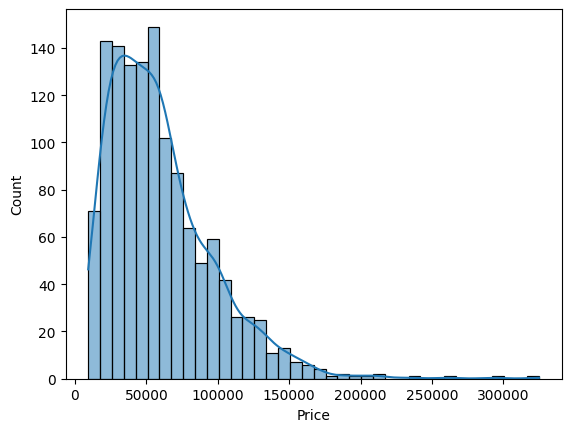

In [352]:
sns.histplot(data['Price'], kde=True)

    Company column
    

major categories present are Lenovo, Dell, HP, Asus, etc.


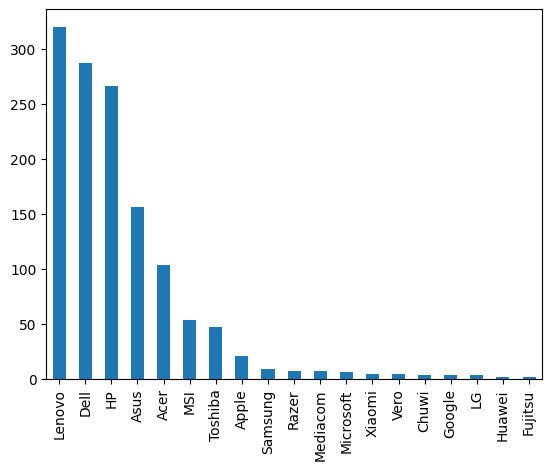

In [353]:
data['Company'].value_counts().plot(kind='bar')
print('major categories present are Lenovo, Dell, HP, Asus, etc.')

company relationship with price


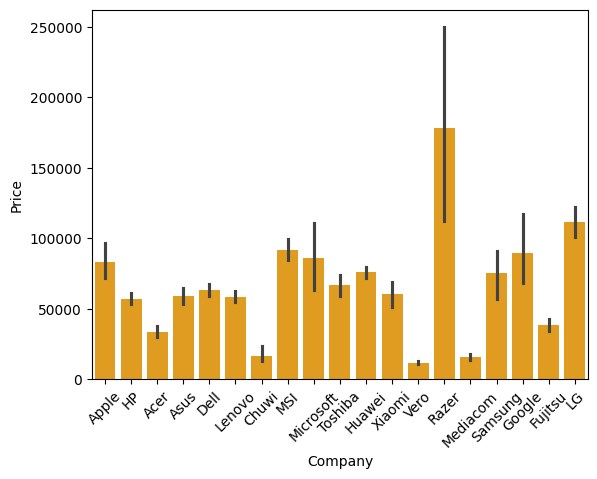

Razer, Apple, LG, Samsung, MSI, Microsoft, Mediacom laptops are expensive, and others are in the budget range.


In [354]:
print('company relationship with price')
sns.barplot(x=data['Company'], y=data['Price'], color='orange')
plt.xticks(rotation=45)
plt.show()
print('Razer, Apple, LG, Samsung, MSI, Microsoft, Mediacom laptops are expensive, and others are in the budget range.')

Type of laptop

<Axes: >

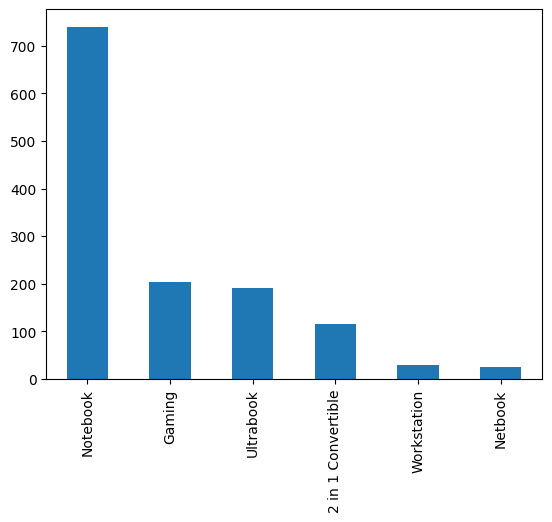

In [355]:
data['TypeName'].value_counts().plot(kind='bar')

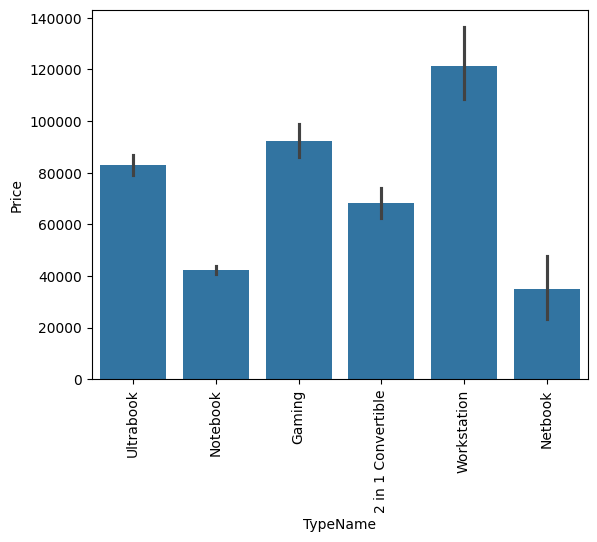

major people prefer notebook because it is under budget range and the same can be concluded from our data.


In [356]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation=90)
plt.show()
print('major people prefer notebook because it is under budget range and the same can be concluded from our data.')

Does the price vary with laptop size in inches?

<Axes: xlabel='Inches', ylabel='Density'>

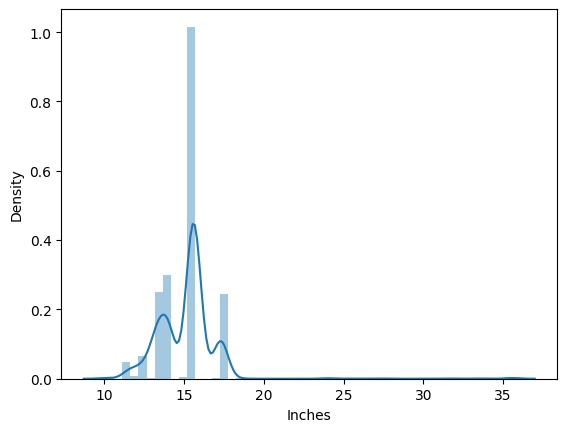

In [357]:
sns.distplot(data['Inches'], kde=True)

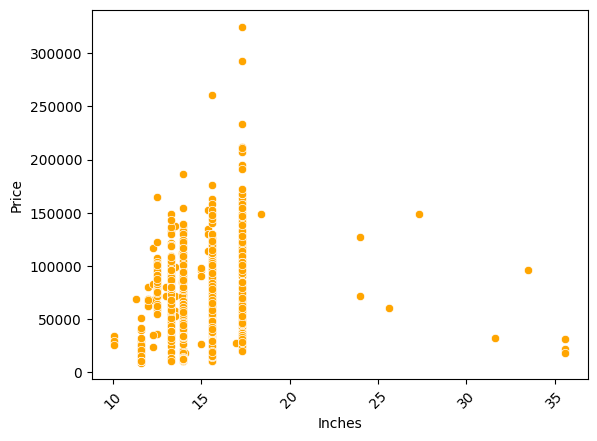

there is a relationship but not a strong relationship between the price and size column.


In [358]:
sns.scatterplot(x=data['Inches'], y=data['Price'], color='orange')
plt.xticks(rotation=45)
plt.show()
print('there is a relationship but not a strong relationship between the price and size column.')

# Feature Engineering

Screen Resolution

All value gives information related to the presence of an IPS panel, are a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, we will extract the column into 3 new columns in the dataset.

In [359]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                525
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Extract Touch screen information

It is a binary variable so we can encode it as 0 and 1. one means the laptop is a touch screen and zero indicates not a touch screen.

Terms to focus on: Touchscreen

In [360]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [361]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: >

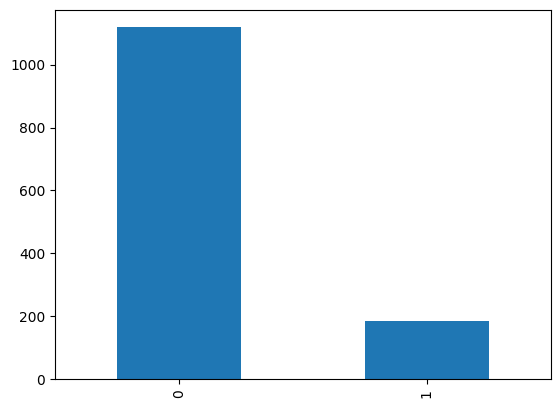

In [362]:
data['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

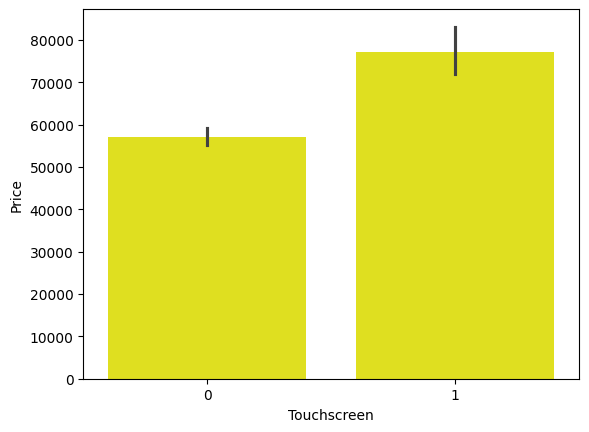

In [363]:
sns.barplot(x=data['Touchscreen'], y=data['Price'], color='yellow')

In [364]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                525
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Extract IPS Channel presence information

It is a binary variable and the code is the same we used above. The laptops with IPS channel are present less in our data but by observing relationship against the price of IPS channel laptops are high.

In [365]:
data['Ips'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
data.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1


<Axes: >

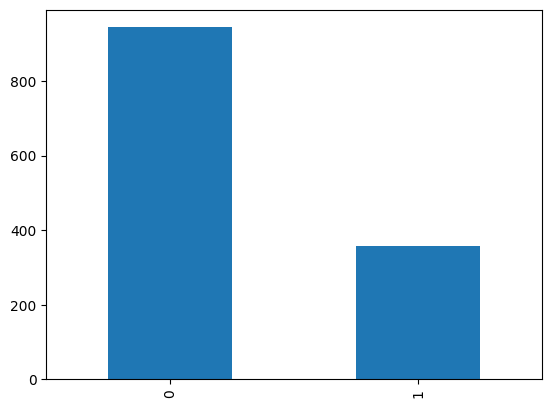

In [366]:
data['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

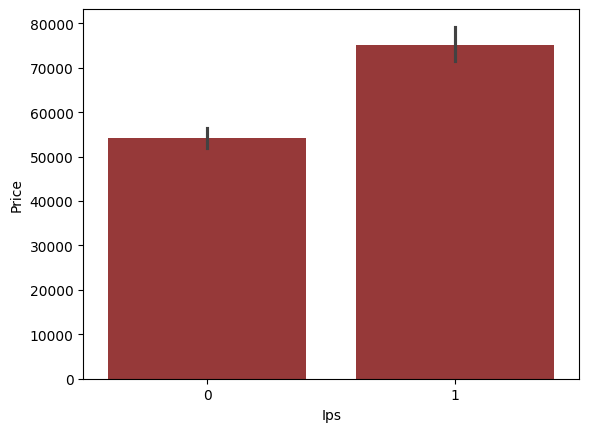

In [367]:
sns.barplot(x=data['Ips'], y=data['Price'], color='brown')

 The laptops with IPS channel are present less in our data but by observing relationship against the price of IPS channel laptops are high.

Extract X-axis and Y-axis screen resolution dimensions

Now both the dimension are present at end of a string and separated with a cross sign. So first we will split the string with space and access the last string from the list. then split the string with a cross sign and access the zero and first index for X and Y-axis dimensions.

In [368]:
NewResolution= data['ScreenResolution'].str.split('x', n=1, expand=True)
data['X_res'] = NewResolution[0]
data['Y_res'] = NewResolution[1]

In [369]:
data.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800


In [370]:
data['X_res'] = data['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [371]:
data.head(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800


In [372]:
data.dtypes

Company              object
TypeName             object
Inches              float32
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
Ips                   int64
X_res                object
Y_res                object
dtype: object

In [373]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [374]:
data['Price'].dtypes

dtype('float64')

In [375]:
data.corr(numeric_only=True)['Price']

Inches         0.044728
Ram            0.685654
Weight         0.175786
Price          1.000000
Touchscreen    0.188978
Ips            0.254242
X_res          0.557484
Y_res          0.554024
Name: Price, dtype: float64

In [376]:
# Calculating PPI(Pixel Per Inch) after seeing strong coorelations among X-res and Y-res

data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')


In [377]:
data.corr(numeric_only=True)['Price']

Inches         0.044728
Ram            0.685654
Weight         0.175786
Price          1.000000
Touchscreen    0.188978
Ips            0.254242
X_res          0.557484
Y_res          0.554024
ppi            0.468658
Name: Price, dtype: float64

In [378]:
data.drop(columns=['ScreenResolution'], inplace=True)

In [379]:
data.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [380]:
data.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629


In [381]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     213
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: Cpu, Length: 118, dtype: int64

#### Making Cpu Categories
- Intel Core i3
- Intel Core i5 
- Intel Core i7 
- AMD Chips
- Others (Intel Celeron, Pentium, Atom, Xeon, etc)

In [382]:
data['Cpu_Name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [383]:
data.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7


In [384]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [385]:
data['Cpu_Brand'] = data['Cpu_Name'].apply(fetch_processor)

In [386]:
data.head(4)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Name,Cpu_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7


<Axes: >

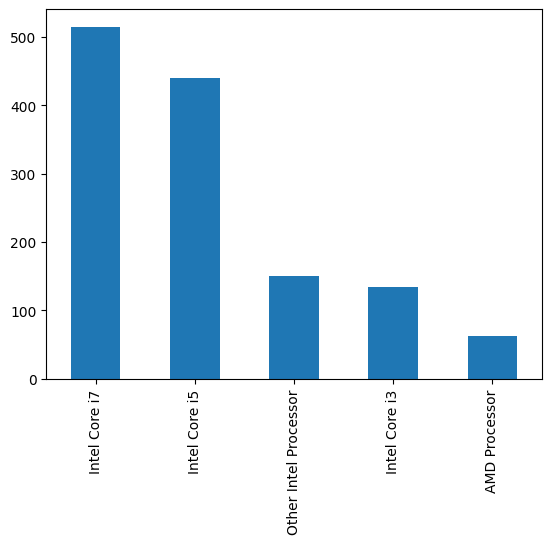

In [387]:
data['Cpu_Brand'].value_counts().plot(kind='bar')

as obvious the price of i7 processor is high, then of i5 processor, i3 and AMD processor lies at the almost the same range. Hence price will depend on the preprocessor.

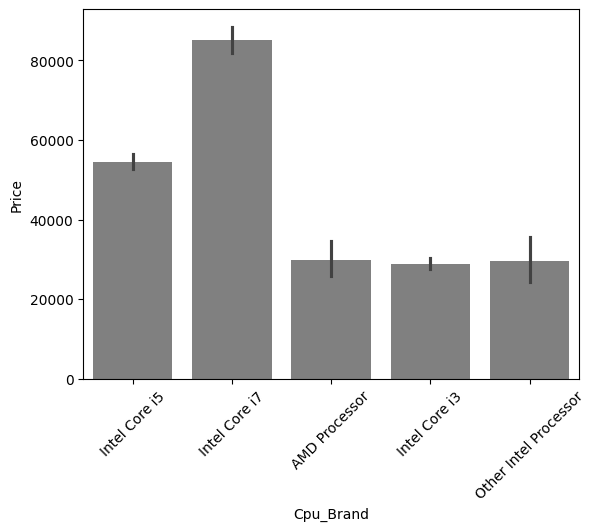

In [388]:
sns.barplot(x=data['Cpu_Brand'], y=data['Price'], color='grey')
plt.xticks(rotation=45)
plt.show()

In [389]:
data.drop(columns={'Cpu', 'Cpu_Name'}, inplace=True)
data.head(4)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7


 Price with Ram

<Axes: >

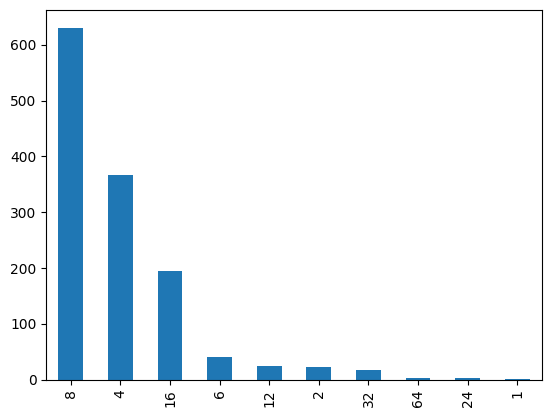

In [390]:
data['Ram'].value_counts().plot(kind='bar')

It seems as Ram increases, the prices increases as well. Price of 32GB Ram laptops are marked at good price but 64gb Ram laptop are much lower than 32gb Ram.


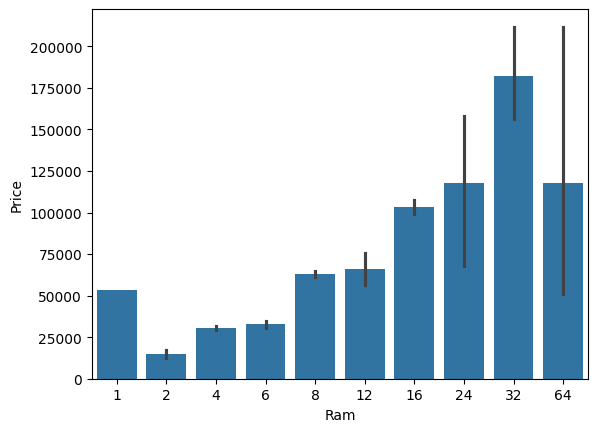

In [391]:
sns.barplot(x=data['Ram'], y=data['Price'])
print('It seems as Ram increases, the prices increases as well. Price of 32GB Ram laptops are marked at good price but 64gb Ram laptop are much lower than 32gb Ram.')

Memory Column

In [392]:
data['Memory'].value_counts()

256GB SSD                        432
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

memory column is again a noisy column that gives an understanding of hard drives. many laptops came with HHD and SSD both, as well in some there is an external slot present to insert after purchase.

In [393]:
# Convert 'Memory' column to string and clean it
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')

# Split 'Memory' into two parts based on '+'
new = data["Memory"].str.split("+", n=1, expand=True)

# Extract the first part and remove any leading/trailing whitespace
data["first"] = new[0]
data["first"] = data["first"].str.strip()

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'first' and create binary columns
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in str(x) else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in str(x) else 0)
data["Layer1Hybrid"] = data["first"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
data["Layer1Flash_Storage"] = data["first"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'first' and convert it to float
data['first'] = data['first'].str.extract('(\d+)').astype(float)

# Extract the second part from the split and fill any NaN values with '0'
data["second"] = new[1]
data["second"].fillna("0", inplace=True)

# Check if 'HDD', 'SSD', 'Hybrid', and 'Flash Storage' exist in 'second' and create binary columns
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in str(x) else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in str(x) else 0)
data["Layer2Hybrid"] = data["second"].apply(
    lambda x: 1 if "Hybrid" in str(x) else 0)
data["Layer2Flash_Storage"] = data["second"].apply(
    lambda x: 1 if "Flash Storage" in str(x) else 0)

# Extract the numeric part from 'second' and convert it to float
data['second'] = data['second'].str.extract('(\d+)').astype(float)

# Calculate HDD, SSD, Hybrid, and Flash_Storage based on binary values and numeric parts
data["HDD"] = (data["first"] * data["Layer1HDD"] +
             data["second"] * data["Layer2HDD"]).astype(int)
data["SSD"] = (data["first"] * data["Layer1SSD"] +
             data["second"] * data["Layer2SSD"]).astype(int)
data["Hybrid"] = (data["first"] * data["Layer1Hybrid"] +
                data["second"] * data["Layer2Hybrid"]).astype(int)
data["Flash_Storage"] = (data["first"] * data["Layer1Flash_Storage"] +
                       data["second"] * data["Layer2Flash_Storage"]).astype(int)

# Drop the intermediate and binary columns
data.drop(columns=['first', 'second',
                 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

First, we have cleaned the memory column and then made 4 new columns which are a binary column where each column contains 1 and 0 indicate that amount four is present and which is not present. Any laptop has a single type of memory or a combination of two. so in the first column, it consists of the first memory size and if the second slot is present in the laptop then the second column contains it else we fill the null values with zero. After that in a particular column, we have multiplied the values by their binary value. It means that if in any laptop particular memory is present then it contains binary value as one and the first value will be multiplied by it, and same with the second combination. For the laptop which does have a second slot, the value will be zero multiplied by zero is zero.

In [394]:
data.head(4)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0


Now when we see the correlation of price then Hybrid and flash storage have very less or no correlation with a price. We will drop this column with memory which is no longer required.

In [395]:
data.drop(columns=['Memory'], inplace=True)

In [396]:
data.head(4)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0


In [397]:
data.corr(numeric_only=True)['Price']

Ram              0.685654
Weight           0.175786
Price            1.000000
Touchscreen      0.188978
Ips              0.254242
ppi              0.468658
HDD             -0.094003
SSD              0.667208
Hybrid           0.007925
Flash_Storage   -0.038192
Name: Price, dtype: float64

In [398]:
data.drop(columns={'Hybrid', 'Flash_Storage'}, inplace=True)

In [399]:
data.head(4)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512


GPU Variable

GPU(Graphical Processing Unit) has many categories in data. We are having which brand graphic card is there on a laptop. we are not having how many capacities like (6Gb, 12 Gb) graphic card is present. so we will simply extract the name of the brand.

In [400]:
data['Gpu'].value_counts()

Intel HD Graphics 620      301
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [401]:
data['GpuBrand'] = data['Gpu'].apply(lambda x: x.split()[0])

In [402]:
data.head(4)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD


In [403]:
data['GpuBrand'].value_counts()

Intel     733
Nvidia    393
AMD       176
ARM         1
Name: GpuBrand, dtype: int64

In [404]:
data = data[data['GpuBrand'] != 'ARM']

In [405]:
data['GpuBrand'].value_counts()

Intel     733
Nvidia    393
AMD       176
Name: GpuBrand, dtype: int64

<Axes: xlabel='GpuBrand', ylabel='Price'>

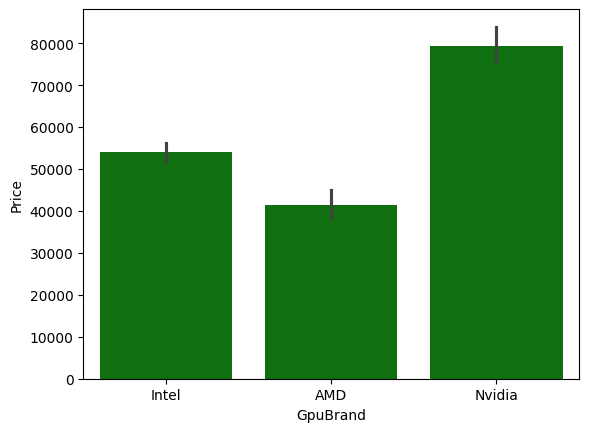

In [406]:
sns.barplot(x=data['GpuBrand'], y=data['Price'], color='green')

The Price of Gpu Nvidia is highest.

In [407]:
data.drop(columns={'Gpu'}, inplace=True)

In [408]:
data.head(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD


Operating System Column

In [409]:
data['OpSys'].value_counts()

Windows 10      1077
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

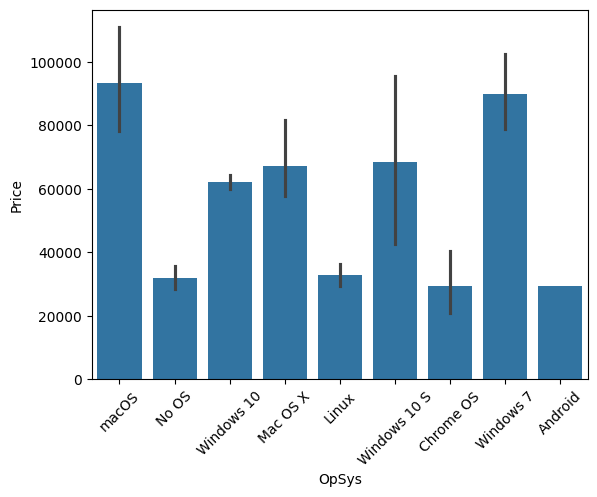

In [410]:
sns.barplot(x=data['OpSys'], y=data['Price'])
plt.xticks(rotation=45)
plt.show()

MacOS is most expensive.

In [411]:
def categoryOS(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [412]:
data['OS']=data['OpSys'].apply(categoryOS)

In [413]:
data.head(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD,Mac


In [414]:
data.drop(columns=['OpSys'], inplace=True)

In [415]:
data.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others


<Axes: xlabel='OS', ylabel='Price'>

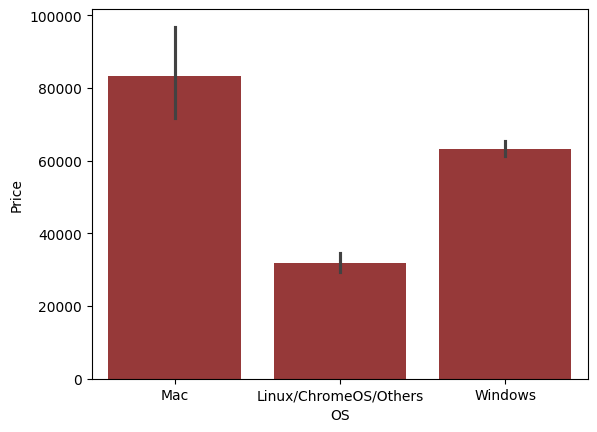

In [416]:
sns.barplot(x=data['OS'], y=data['Price'], color='brown')

<Axes: xlabel='Weight', ylabel='Count'>

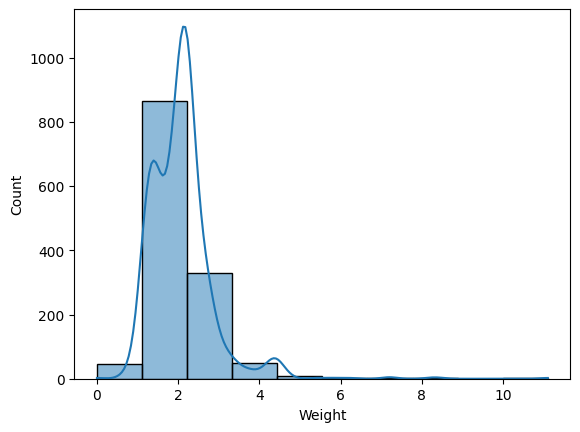

In [417]:
sns.histplot(data["Weight"], kde=True, bins=10)

<Axes: xlabel='Weight', ylabel='Price'>

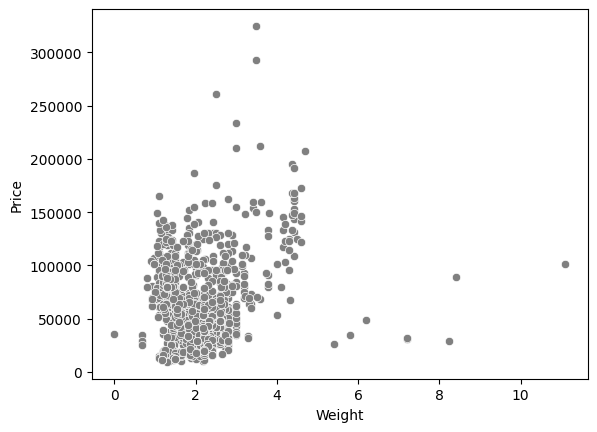

In [418]:
sns.scatterplot(x=data["Weight"], y=data["Price"], color='grey')

In [419]:
data.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.282395,0.685527,0.096707,0.216453,0.291278,0.076629,0.567959
Weight,0.282395,1.000000,0.175306,-0.250562,0.001415,-0.275312,0.400920,-0.025760
Price,0.685527,0.175306,1.000000,0.190724,0.255382,0.470577,-0.094449,0.667064
Touchscreen,0.096707,-0.250562,0.190724,1.000000,0.155089,0.441589,-0.193408,0.243779
Ips,0.216453,0.001415,0.255382,0.155089,1.000000,0.304835,-0.084212,0.226446
ppi,0.291278,-0.275312,0.470577,0.441589,0.304835,1.000000,-0.285191,0.504154
HDD,0.076629,0.400920,-0.094449,-0.193408,-0.084212,-0.285191,1.000000,-0.402806
SSD,0.567959,-0.025760,0.667064,0.243779,0.226446,0.504154,-0.402806,1.000000


<Axes: >

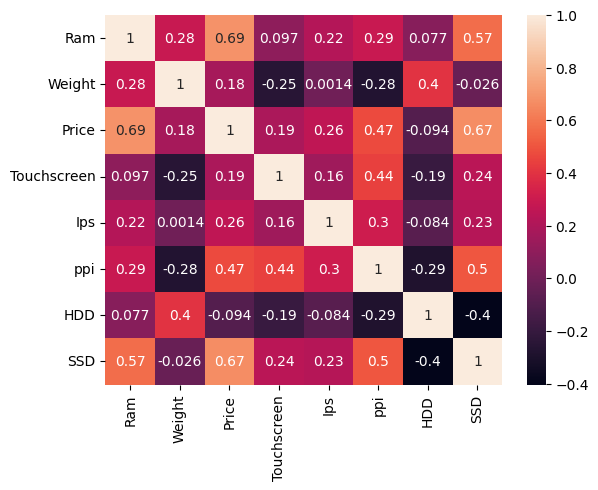

In [420]:
# Red means strongest correlation and white means extremely weak correlation
sns.heatmap(data.corr(numeric_only=True), annot=True)

Log-Normal Transformation

The distribution of the Price variable above was right-skewed. By transforming it to normal distribution performance of the algorithm will increase. we take the log of values that transform to the normal distribution. So while separating dependent and independent variables take a log of price, and in displaying the result perform exponent of it.

<Axes: xlabel='Price', ylabel='Count'>

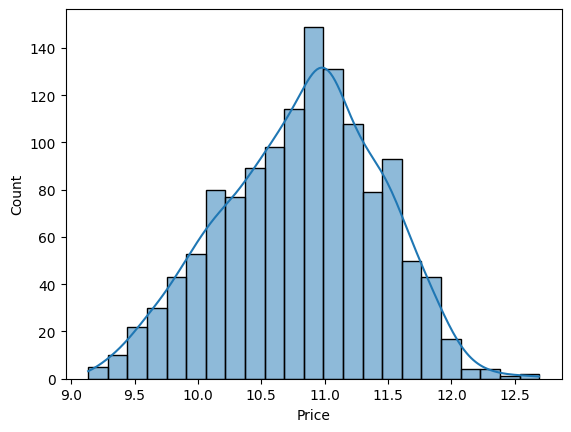

In [421]:
sns.histplot(np.log(data['Price']), kde=True)

# Model Training

In [422]:
data1= data.copy()

In [423]:
data1.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


In [424]:
col=['Company', 'TypeName', 'Cpu_Brand', 'GpuBrand', 'OS']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in col:
    data1[i]= le.fit_transform(data1[i])
data1.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,1,4,8,1.37,71378.6832,0,1,226.983001,2,0,128,1,1
1,1,4,8,1.34,47895.5232,0,0,127.677938,2,0,0,1,1
2,7,3,8,1.86,30636.0000,0,0,141.211995,2,0,256,1,0
3,1,4,16,1.83,135195.3360,0,1,220.534629,3,0,512,0,1
4,1,4,8,1.37,96095.8080,0,1,226.983001,2,0,256,1,1


In [425]:
data1['Company'].value_counts()

10    320
4     287
7     266
2     156
0     103
11     53
16     47
1      21
15      8
14      7
12      7
13      6
18      4
17      4
3       3
6       3
9       3
8       2
5       2
Name: Company, dtype: int64

In [426]:
X = data1.drop(columns=['Price'])
y = np.log(data1['Price'])

In [427]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [428]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
183,16,3,8,2.00,0,0,100.454667,2,0,128,1,2
1141,11,1,8,2.40,0,0,141.211995,3,1000,128,2,2
1049,2,2,4,1.20,0,0,135.094207,4,0,0,1,0
1020,4,0,4,2.08,1,1,141.211995,1,1000,0,1,2
878,4,3,4,2.18,0,0,141.211995,2,1000,128,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
466,0,3,4,2.20,0,0,100.454667,1,500,0,2,2
299,2,4,16,1.63,0,0,141.211995,3,0,512,2,2
493,0,3,8,2.20,0,0,100.454667,0,1000,0,0,2
527,10,3,8,2.20,0,0,100.454667,1,2000,0,2,0


In [429]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [430]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [431]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [432]:
data1.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,1,4,8,1.37,71378.6832,0,1,226.983001,2,0,128,1,1
1,1,4,8,1.34,47895.5232,0,0,127.677938,2,0,0,1,1
2,7,3,8,1.86,30636.0000,0,0,141.211995,2,0,256,1,0
3,1,4,16,1.83,135195.3360,0,1,220.534629,3,0,512,0,1
4,1,4,8,1.37,96095.8080,0,1,226.983001,2,0,256,1,1


LINEAR REGRESSION

Training Data
r2score_train= 0.6367800602991636
maescore_train= 0.29423000039646613
Testing Data
r2score_test= 0.6197955578219481
maescore_test= 0.28782136872844594


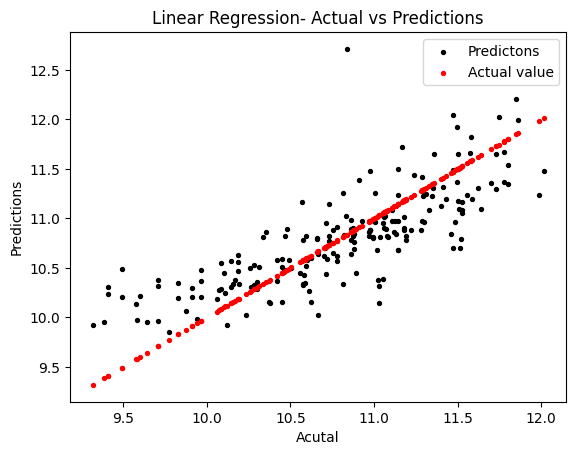

In [444]:
LR= LinearRegression()
LR.fit(x_train, y_train)
y_train_pred= LR.predict(x_train)
y_pred= LR.predict(x_test)

print('Training Data')
print('r2score_train=', r2_score(y_train, y_train_pred))
print('maescore_train=', mean_absolute_error(y_train, y_train_pred))

print('Testing Data')
print('r2score_test=', r2_score(y_test, y_pred))
print('maescore_test=', mean_absolute_error(y_test, y_pred))



plt.scatter(y_test, y_pred, color='black', s=8, label='Predictons')
plt.scatter(y_test, y_test, color='red', s=8, label='Actual value')
plt.legend(loc='best')
plt.title('Linear Regression- Actual vs Predictions')
plt.xlabel('Acutal')
plt.ylabel('Predictions')
plt.show()

Traning Data
r2score_train1= 0.9795347612032279
maescore_train1= 0.06434367939682464
Testing Data
r2score_test1= 0.8647080952166579
maescore_test1= 0.16228040077295752


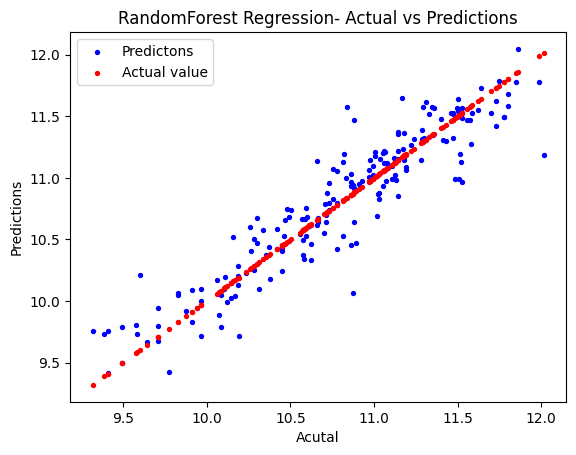

In [449]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_train_pred1= rf.predict(x_train)
y_pred1= rf.predict(x_test)

print('Traning Data')

print('r2score_train1=', r2_score(y_train, y_train_pred1))
print('maescore_train1=', mean_absolute_error(y_train, y_train_pred1))

print("Testing Data")

print('r2score_test1=', r2_score(y_test, y_pred1))
print('maescore_test1=', mean_absolute_error(y_test, y_pred1))

plt.scatter(y_test, y_pred1, color='blue', s=8, label='Predictons')
plt.scatter(y_test, y_test, color='red', s=8, label='Actual value')
plt.legend(loc='best')
plt.title('RandomForest Regression- Actual vs Predictions')
plt.xlabel('Acutal')
plt.ylabel('Predictions')
plt.show()
plt.show()

XGBOOSE Model

Traning Data
r2score_train2= 0.9900461221916874
maescore_train2= 0.04187018527349816
Testing Data
r2score_test2= 0.8635247097292404
maescore_test2= 0.159635260074481


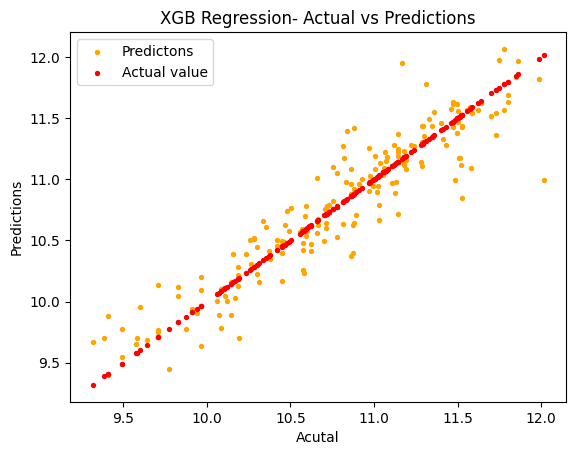

In [450]:
xgb= XGBRegressor()
xgb.fit(x_train, y_train)
y_train_pred2= xgb.predict(x_train)
y_pred2= xgb.predict(x_test)

print('Traning Data')

print('r2score_train2=', r2_score(y_train, y_train_pred2))
print('maescore_train2=', mean_absolute_error(y_train, y_train_pred2))

print("Testing Data")

print('r2score_test2=', r2_score(y_test, y_pred2))
print('maescore_test2=', mean_absolute_error(y_test, y_pred2))

plt.scatter(y_test, y_pred2, color='orange', s=8, label='Predictons')
plt.scatter(y_test, y_test, color='red', s=8, label='Actual value')
plt.legend(loc='best')
plt.title('XGB Regression- Actual vs Predictions')
plt.xlabel('Acutal')
plt.ylabel('Predictions')
plt.show()
plt.show()

Support Vector Machine Model

Traning Data
r2score_train3= 0.6169055418532308
maescore_train3= 0.2934646541390733
Testing Data
r2score_test3= 0.6032409917268153
maescore_test3= 0.2907214258667994


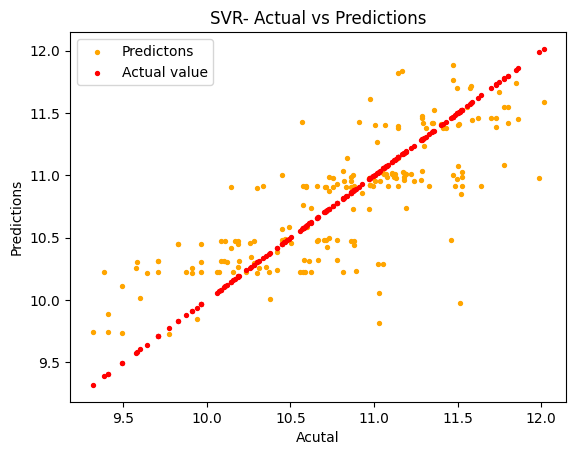

In [436]:
svm= SVR()
svm.fit(x_train, y_train)
y_train_pred3= svm.predict(x_train)
y_pred3= svm.predict(x_test)

print('Traning Data')

print('r2score_train3=', r2_score(y_train, y_train_pred3))
print('maescore_train3=', mean_absolute_error(y_train, y_train_pred3))

print("Testing Data")

print('r2score_test3=', r2_score(y_test, y_pred3))
print('maescore_test3=', mean_absolute_error(y_test, y_pred3))

plt.scatter(y_test, y_pred3, color='orange', s=8, label='Predictons')
plt.scatter(y_test, y_test, color='red', s=8, label='Actual value')
plt.legend(loc='best')
plt.title('SVR- Actual vs Predictions')
plt.xlabel('Acutal')
plt.ylabel('Predictions')
plt.show()
plt.show()

KNN Implementation

Traning Data
r2score_train4= 0.8375960566672944
maescore_train4= 0.18324901175355088
Testing Data
r2score_test4= 0.7528205232838543
maescore_test4= 0.2193167216938983


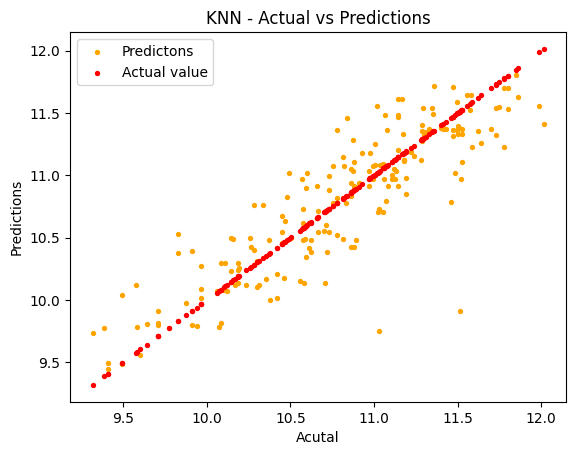

In [437]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)
y_train_pred4= knn.predict(x_train)
y_pred4= knn.predict(x_test)

print('Traning Data')

print('r2score_train4=', r2_score(y_train, y_train_pred4))
print('maescore_train4=', mean_absolute_error(y_train, y_train_pred4))

print("Testing Data")

print('r2score_test4=', r2_score(y_test, y_pred4))
print('maescore_test4=', mean_absolute_error(y_test, y_pred4))

plt.scatter(y_test, y_pred4, color='orange', s=8, label='Predictons')
plt.scatter(y_test, y_test, color='red', s=8, label='Actual value')
plt.legend(loc='best')
plt.title('KNN - Actual vs Predictions')
plt.xlabel('Acutal')
plt.ylabel('Predictions')
plt.show()
plt.show()

In [438]:
data1.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_Brand,HDD,SSD,GpuBrand,OS
0,1,4,8,1.37,71378.6832,0,1,226.983001,2,0,128,1,1
1,1,4,8,1.34,47895.5232,0,0,127.677938,2,0,0,1,1
2,7,3,8,1.86,30636.0000,0,0,141.211995,2,0,256,1,0
3,1,4,16,1.83,135195.3360,0,1,220.534629,3,0,512,0,1
4,1,4,8,1.37,96095.8080,0,1,226.983001,2,0,256,1,1


In [439]:
import warnings
warnings.filterwarnings('ignore')
transformers = [
    ('col_tnf', OneHotEncoder(
        sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
]

In [446]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Create a Random Forest Regressor model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(x_train, y_train)

y_pred5 = pipe.predict(x_test)

r2 = r2_score(y_test, y_pred5)*100
mae = mean_absolute_error(y_test, y_pred5)*100

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 86.92447283982835
Mean Absolute Error: 16.156949044500028


In [457]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')


step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

pipe.fit(x_train, y_train)

y_pred6 = pipe.predict(x_test)

r2 = r2_score(y_test, y_pred6)*100
mae = mean_absolute_error(y_test, y_pred6)*100

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 88.27059985134854
Mean Absolute Error: 15.279094837828858


# Personal Customization Hypertune Parameters


Random Forest Regressor Model - Tuned


In [442]:

step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
])

# Parameter grid for hyperparameter tuning
param_grid = {
    'step2__n_estimators': [100, 200, 300],
    'step2__max_depth': [10, 15, 20],
    'step2__max_features': [0.6, 0.7, 0.8],
}

# GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predictions on the test data using the tuned model
y_pred8 = best_estimator.predict(x_test)

# Evaluate the tuned model
r2 = r2_score(y_test, y_pred8)
mae = mean_absolute_error(y_test, y_pred8)

print('Best Parameters:', best_params)
print('R2 Score:', round(r2, 2), '(', round(r2 * 100, 2), '%)')
print('Mean Absolute Error:', round(mae, 2), '(', round(mae * 100, 2), '%)')

Best Parameters: {'step2__max_depth': 10, 'step2__max_features': 0.6, 'step2__n_estimators': 100}
R2 Score: 0.87 ( 87.32 %)
Mean Absolute Error: 0.16 ( 16.3 %)


Questions to Explore:
Which features have the most significant impact on laptop prices?
- RAM, PPI, SSD has the most significant impact on laptop prices.

Can the model accurately predict the prices of laptops from lesser-known brands?
- Not everytime. But if the other specifications like CPU, RAM, GPU etc. is present in other category. It will predict accurately.

Does the brand of the laptop significantly influence its price?
- Apple is the only brand that significantly influence its price. But for others it depends on configuartions.

How well does the model perform on laptops with high-end specifications compared to budget laptops?
- Model is performing good on both.

What are the limitations and challenges in predicting laptop prices accurately?
- Lack of data of most laptop companies which will effect making predictions accurately. ent in the training dataset.

